<a href="https://colab.research.google.com/github/yahmskeano/Air-Quality/blob/main/DataGather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import openaq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [ ]:
api = openaq.OpenAQ()

resp = api.locations(country='FR', parameter='pm25', df=True, limit=10000)
resp

/usr/local/lib/python3.7/dist-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.latitude,coordinates.longitude
0,2676,FR,Drôme,"[AIR RHONE ALPES, ATMO AUVERGNE-RH�NE-ALPES, D...",FR36021,"[Dr�me Rurale Sud-SND, Drôme Rurale Sud-SND, F...",EEA France,[EEA France],government,[government],2016-11-23 00:00:00+00:00,2021-10-04 18:00:00+00:00,"[pm10, o3, no2, pm25]","[{'parameter': 'pm10', 'count': 78338}, {'para...",310483,44.569431,5.278968
1,2679,FR,Loire,"[AIR RHONE ALPES, ATMO AUVERGNE-RH�NE-ALPES, L...",FR29424,"[FR29424, SAINT ETIENNE SUD]",EEA France,[EEA France],government,[government],2016-11-21 12:00:00+00:00,2021-10-04 18:00:00+00:00,"[pm10, no2, o3, pm25, so2]","[{'parameter': 'pm10', 'count': 81845}, {'para...",328470,45.420088,4.395421
2,2684,FR,Deux-Sèvres,"[ATMO NOUVELLE-AQUITAINE, ATMO POITOU-CHARENTE...",FR09302,"[FR09302, Zoodyss�e Chiz�, Zoodyssée Chizé]",EEA France,[EEA France],government,[government],2016-11-23 00:00:00+00:00,2021-10-04 18:00:00+00:00,"[o3, no2, pm25, pm10]","[{'parameter': 'o3', 'count': 82570}, {'parame...",269725,46.143157,-0.396042
3,2690,FR,Haute-Savoie,"[AIR RHONE ALPES, ATMO AUVERGNE-RH�NE-ALPES, H...",FR33302,"[FR33302, St Germain/Rh�ne, St Germain/Rhône]",EEA France,[EEA France],government,[government],2016-11-21 12:00:00+00:00,2021-10-04 18:00:00+00:00,"[no2, pm25, so2, pm10, o3]","[{'parameter': 'no2', 'count': 59537}, {'param...",294042,46.072219,5.820832
4,2693,FR,Doubs,"[ATMO BOURGOGNE-FRANCHE-COMTE, ATMO FRANCHE CO...",FR82010,"[FR82010, Montbéliard centre, Montb�liard centre]",EEA France,[EEA France],government,[government],2016-11-21 12:00:00+00:00,2021-10-04 18:00:00+00:00,"[pm10, no2, pm25, o3]","[{'parameter': 'pm10', 'count': 79358}, {'para...",277453,47.510303,6.794003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,3545,FR,Drôme,"[AIR RHONE ALPES, Drôme]",FR36003,"[FR36003, Valence Trafic]",EEA France,[EEA France],government,[government],2016-11-23 00:00:00+00:00,2017-12-08 14:00:00+00:00,"[pm25, pm10, no2]","[{'parameter': 'pm25', 'count': 2987}, {'param...",7335,44.948922,4.889881
205,5352,FR,Hérault,[Hérault],FR08026,[FR08026],EEA France,[EEA France],government,[government],2017-12-07 01:00:00+00:00,2017-12-08 06:00:00+00:00,"[pm10, pm25, no2]","[{'parameter': 'pm10', 'count': 42}, {'paramet...",102,43.428219,3.603556
206,3705,FR,ATMO HAUTS DE FRANCE,"[ATMO HAUTS DE FRANCE, ATMO NORD-PAS-DE-CALAIS]",Cappelle,[Cappelle],EEA France,[EEA France],government,[government],2016-11-21 14:00:00+00:00,2017-07-18 20:00:00+00:00,"[pm25, o3, no2]","[{'parameter': 'pm25', 'count': 3282}, {'param...",9896,50.995965,2.366270
207,2673,FR,AIR NORMAND,[AIR NORMAND],Evreux Boulevard de Normandie,[Evreux Boulevard de Normandie],EEA France,[EEA France],government,[government],2016-11-21 11:00:00+00:00,2016-12-05 17:00:00+00:00,"[no2, pm25]","[{'parameter': 'no2', 'count': 33}, {'paramete...",60,49.020202,1.138713


In [ ]:
def add_zero(number, last=False):
  if number < 10:
    return '0-0' + str(number)
  elif number == 12 & last == True:
    return '1-' + str(number)
  elif number >= 10:
    return '0-' + str(number)

def get_month_data(month):

  if month == 12:
    end_month =  12
  else: 
    end_month = month+1

  month = add_zero(month)
  end_month = add_zero(end_month, True)

  df = '202'+str(month)+'-01'
  dt = '202'+str(end_month)+'-01'
  print(df)
  print(dt)

  res = api.measurements(country='FR', parameter='pm25', 
                       date_from=df,
                       date_to=dt,
                       limit=100000,
                       df=True)
  return(res)


res = pd.DataFrame()

for i in range(1,2):
  print(i)
  res = pd.concat([res, get_month_data(i)])



1
2020-01-01
2020-02-01


/usr/local/lib/python3.7/dist-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [ ]:
res

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-02-01 01:00:00,FR14028,pm25,2.6,b'\xc2\xb5g/m\xc2\xb3',FR,Marne,2020-02-01 00:00:00+00:00,49.046116,3.955911
2020-02-01 01:00:00,FR06003,pm25,1.9,b'\xc2\xb5g/m\xc2\xb3',FR,Nord,2020-02-01 00:00:00+00:00,50.378241,3.065860
2020-01-31 23:00:00,FR39008,pm25,26.3,b'\xc2\xb5g/m\xc2\xb3',FR,Schoelcher,2020-02-01 00:00:00+00:00,14.616392,-61.100801
2020-02-01 01:00:00,FR36019,pm25,20.4,b'\xc2\xb5g/m\xc2\xb3',FR,Drôme,2020-02-01 00:00:00+00:00,45.042470,5.044301
2020-02-01 01:00:00,FR04002,pm25,2.8,b'\xc2\xb5g/m\xc2\xb3',FR,Hauts-de-Seine,2020-02-01 00:00:00+00:00,48.929692,2.294719
...,...,...,...,...,...,...,...,...,...
2020-01-01 01:00:00,FR16038,pm25,283.3,b'\xc2\xb5g/m\xc2\xb3',FR,Bas-Rhin,2020-01-01 00:00:00+00:00,48.570375,7.766331
2020-01-01 01:00:00,FR82006,pm25,16.6,b'\xc2\xb5g/m\xc2\xb3',FR,Doubs,2020-01-01 00:00:00+00:00,47.247400,6.015416
2020-01-01 01:00:00,FR10004,pm25,27.0,b'\xc2\xb5g/m\xc2\xb3',FR,Nord,2020-01-01 00:00:00+00:00,51.048572,2.420043


In [ ]:
np.datetime64('2021-01-01')

numpy.datetime64('2021-01-01')

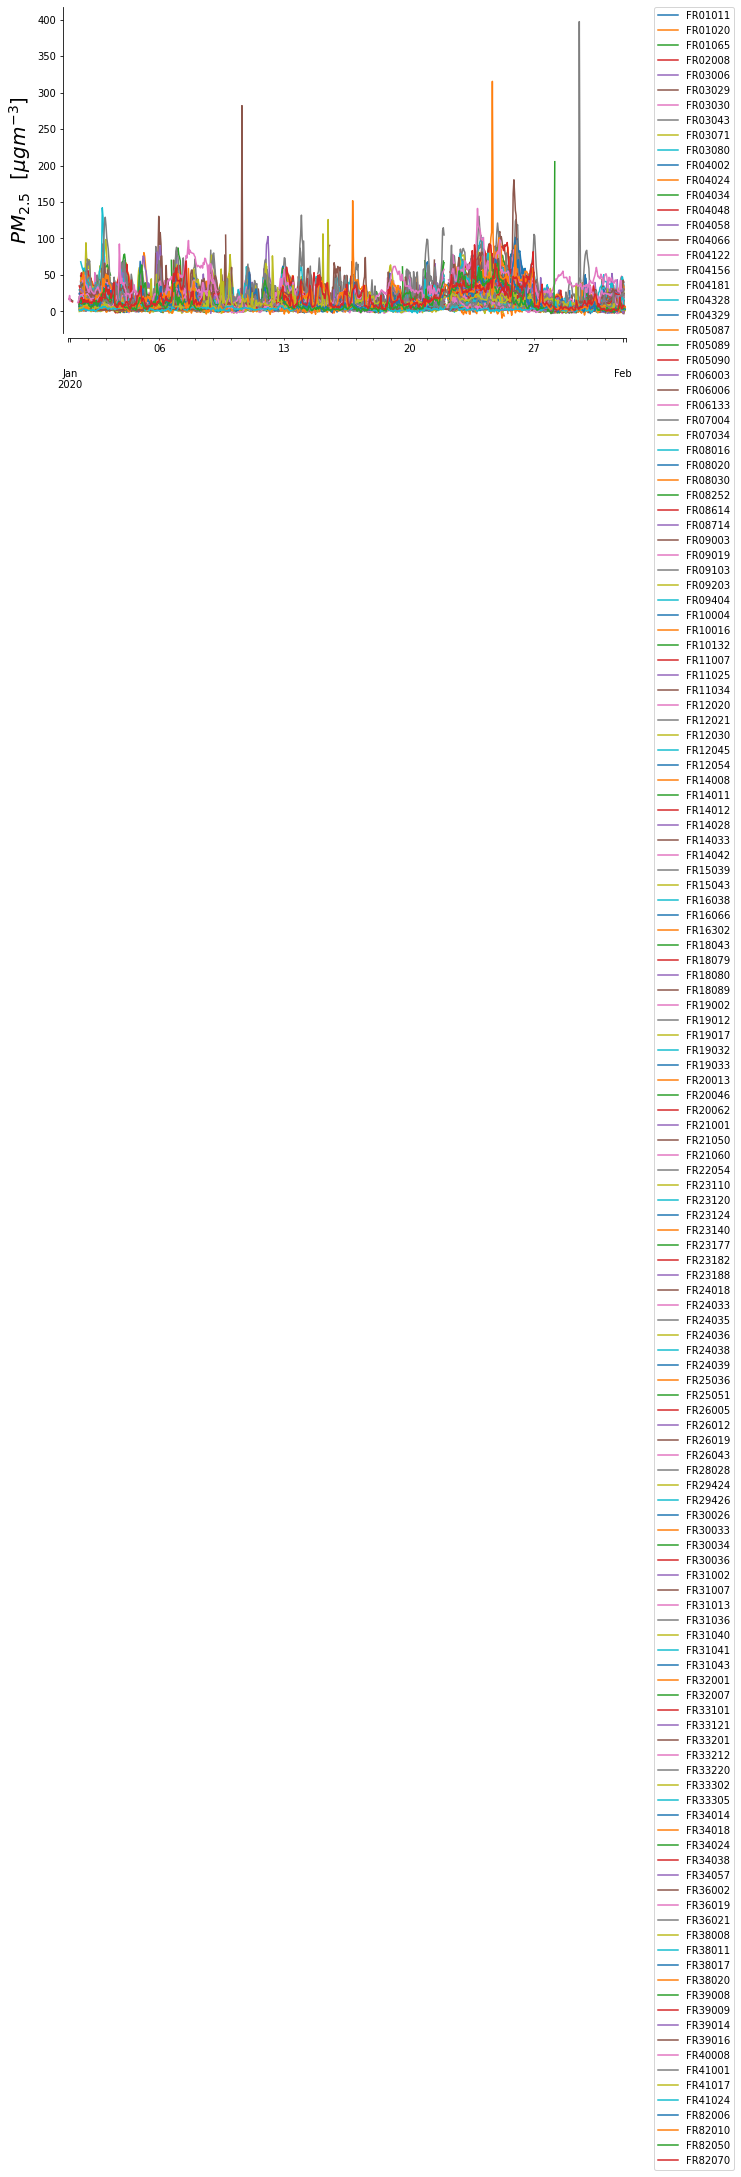

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))

for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to hourly
    _df = df.query("value <= 20000").resample('1h').mean()

    _df.value.plot(ax=ax, label=group)

ax.legend(loc='best')
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("")
sns.despine(offset=5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
res

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-10-04 20:00:00,FR15048,pm25,1.9,b'\xc2\xb5g/m\xc2\xb3',FR,Isère,2021-10-04 18:00:00+00:00,45.279684,5.882204
2021-10-04 20:00:00,FR33121,pm25,3.6,b'\xc2\xb5g/m\xc2\xb3',FR,Savoie,2021-10-04 18:00:00+00:00,45.675001,6.389726
2021-10-04 20:00:00,FR12030,pm25,2.2,b'\xc2\xb5g/m\xc2\xb3',FR,Haute-Garonne,2021-10-04 18:00:00+00:00,43.587193,1.443889
2021-10-04 20:00:00,FR31036,pm25,3.4,b'\xc2\xb5g/m\xc2\xb3',FR,Landes,2021-10-04 18:00:00+00:00,43.704720,-1.038614
2021-10-04 20:00:00,FR09404,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',FR,Vienne,2021-10-04 18:00:00+00:00,46.583909,0.345556
...,...,...,...,...,...,...,...,...,...
2021-09-28 02:00:00,FR34038,pm25,2.0,b'\xc2\xb5g/m\xc2\xb3',FR,Cher,2021-09-28 00:00:00+00:00,46.814819,2.610082
2021-09-28 04:00:00,FR38011,pm25,4.2,b'\xc2\xb5g/m\xc2\xb3',FR,Saint-Pierre,2021-09-28 00:00:00+00:00,-21.334424,55.459021
2021-09-28 02:00:00,FR33201,pm25,2.7,b'\xc2\xb5g/m\xc2\xb3',FR,Haute-Savoie,2021-09-28 00:00:00+00:00,45.895257,6.118336
